## HOUSING PREDICTION MODEL 

Importing all the libraries required to read and interpret the data 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
#Reading The Data set and creating a dataframe 
df = pd.read_csv('Housing.csv')
df.head()

price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished

In [3]:
#Creating dummy variables for some of the features that effect the price so that the 
ac = pd.get_dummies(df['airconditioning'], drop_first = True)
ac.rename(columns = {'yes': 'ac'}, inplace = True )

hwh = pd.get_dummies(df['hotwaterheating'],drop_first=True)
hwh.rename(columns = {'yes': 'heating'}, inplace = True )

bsmnt = pd.get_dummies(df['basement'], drop_first = True)
bsmnt.rename(columns = {'yes': 'bsmnt'}, inplace = True )

mainroad = pd.get_dummies(df['mainroad'], drop_first = True)
mainroad.rename(columns = {'yes': 'mainrd'}, inplace = True )

gstroom = pd.get_dummies(df['guestroom'],drop_first = True)
gstroom.rename(columns = {'yes': 'gstroom'}, inplace = True )

prefarea = pd.get_dummies(df['prefarea'], drop_first = True)
prefarea.rename(columns = {'yes': 'pref area'})


furnished = pd.get_dummies(df['furnishingstatus'],drop_first = True)

df.drop(['basement', 'hotwaterheating', 'basement','airconditioning','mainroad', 'guestroom','prefarea','furnishingstatus'], axis = 1, inplace = True)
df = pd.concat([df,ac,hwh,bsmnt,mainroad,gstroom,furnished], axis=1)

df



price  area  bedrooms  bathrooms  stories  parking  ac  heating  \
0    13300000  7420         4          2        3        2   1        0   
1    12250000  8960         4          4        4        3   1        0   
2    12250000  9960         3          2        2        2   0        0   
3    12215000  7500         4          2        2        3   1        0   
4    11410000  7420         4          1        2        2   1        0   
..        ...   ...       ...        ...      ...      ...  ..      ...   
540   1820000  3000         2          1        1        2   0        0   
541   1767150  2400         3          1        1        0   0        0   
542   1750000  3620         2          1        1        0   0        0   
543   1750000  2910         3          1        1        0   0        0   
544   1750000  3850         3          1        2        0   0        0   

     bsmnt  mainrd  gstroom  semi-furnished  unfurnished  
0        0       1        0               0            0  
1        0       1        0               0            0  
2        1       1        0               1            0  
3        1       1        0               0            0  
4        1       1        1               0            0  
..     ...     ...      ...             ...          ...  
540      1       1        0               0            1  
541      0       0        0               1            0  
542      0       1        0               0            1  
543      0       0        0               0            0  
544      0       1        0               0            1  

[545 rows x 13 columns]

In [4]:
df.info()
df.describe().transpose()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   price           545 non-null    int64
 1   area            545 non-null    int64
 2   bedrooms        545 non-null    int64
 3   bathrooms       545 non-null    int64
 4   stories         545 non-null    int64
 5   parking         545 non-null    int64
 6   ac              545 non-null    uint8
 7   heating         545 non-null    uint8
 8   bsmnt           545 non-null    uint8
 9   mainrd          545 non-null    uint8
 10  gstroom         545 non-null    uint8
 11  semi-furnished  545 non-null    uint8
 12  unfurnished     545 non-null    uint8
dtypes: int64(6), uint8(7)
memory usage: 29.4 KB


count          mean           std        min        25%  \
price           545.0  4.766729e+06  1.870440e+06  1750000.0  3430000.0   
area            545.0  5.150541e+03  2.170141e+03     1650.0     3600.0   
bedrooms        545.0  2.965138e+00  7.380639e-01        1.0        2.0   
bathrooms       545.0  1.286239e+00  5.024696e-01        1.0        1.0   
stories         545.0  1.805505e+00  8.674925e-01        1.0        1.0   
parking         545.0  6.935780e-01  8.615858e-01        0.0        0.0   
ac              545.0  3.155963e-01  4.651799e-01        0.0        0.0   
heating         545.0  4.587156e-02  2.093987e-01        0.0        0.0   
bsmnt           545.0  3.504587e-01  4.775519e-01        0.0        0.0   
mainrd          545.0  8.587156e-01  3.486347e-01        0.0        1.0   
gstroom         545.0  1.779817e-01  3.828487e-01        0.0        0.0   
semi-furnished  545.0  4.165138e-01  4.934337e-01        0.0        0.0   
unfurnished     545.0  3.266055e-01  4.694024e-01        0.0        0.0   

                      50%        75%         max  
price           4340000.0  5740000.0  13300000.0  
area               4600.0     6360.0     16200.0  
bedrooms              3.0        3.0         6.0  
bathrooms             1.0        2.0         4.0  
stories               2.0        2.0         4.0  
parking               0.0        1.0         3.0  
ac                    0.0        1.0         1.0  
heating               0.0        0.0         1.0  
bsmnt                 0.0        1.0         1.0  
mainrd                1.0        1.0         1.0  
gstroom               0.0        0.0         1.0  
semi-furnished        0.0        1.0         1.0  
unfurnished           0.0        1.0         1.0

gstroom      0.255517
mainrd       0.296898
bedrooms     0.366494
parking      0.384394
stories      0.420712
ac           0.452954
bathrooms    0.517545
area         0.535997
price        1.000000
Name: price, dtype: float64

<Figure size 1000x600 with 0 Axes>

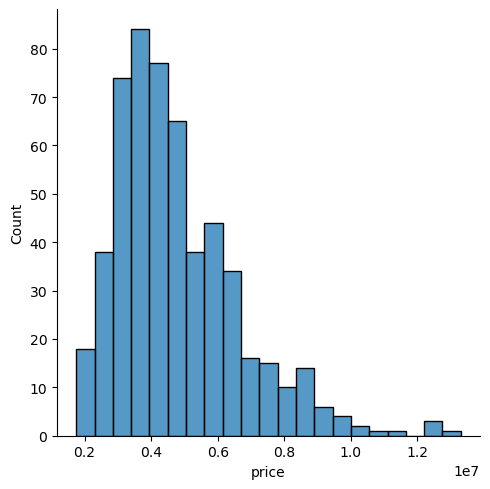

In [5]:
plt.figure(figsize = (10,6))
sns.displot(df['price'])
df.drop(['unfurnished', 'semi-furnished','heating','bsmnt'], axis=1, inplace=True)
df.corr()['price'].sort_values()

In [6]:
#Getting the data ready 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X = df.drop('price', axis=1).values
y = df['price'].values

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)  

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train.shape

(381, 8)

In [7]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout 

model = Sequential()

model.add(Dense(8, activation='relu'))

model.add(Dense(8, activation='relu'))

model.add(Dense(8, activation='relu'))

model.add(Dense(8, activation='relu'))

model.add(Dense(8, activation='relu'))

model.add(Dense(1, activation='relu'))

model.compile(loss = 'mse', optimizer = 'adam')

In [8]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor = 'val_loss', mode='min', verbose=1, patience = 25)
model.fit(x=X_train, y=y_train, epochs=500, validation_data = (X_test, y_test), batch_size =128, callbacks = [early_stop])

Epoch 1/500
3/3 [==============================] - 1s 80ms/step - loss: 24814441988096.0000 - val_loss: 29464857673728.0000
Epoch 2/500
3/3 [==============================] - 0s 13ms/step - loss: 24814441988096.0000 - val_loss: 29464857673728.0000
Epoch 3/500
3/3 [==============================] - 0s 13ms/step - loss: 24814441988096.0000 - val_loss: 29464857673728.0000
Epoch 4/500
3/3 [==============================] - 0s 13ms/step - loss: 24814441988096.0000 - val_loss: 29464857673728.0000
Epoch 5/500
3/3 [==============================] - 0s 14ms/step - loss: 24814441988096.0000 - val_loss: 29464857673728.0000
Epoch 6/500
3/3 [==============================] - 0s 12ms/step - loss: 24814441988096.0000 - val_loss: 29464857673728.0000
Epoch 7/500
3/3 [==============================] - 0s 12ms/step - loss: 24814441988096.0000 - val_loss: 29464857673728.0000
Epoch 8/500
3/3 [==============================] - 0s 12ms/step - loss: 24814441988096.0000 - val_loss: 29464857673728.0000
Epoch 9/

3/3 [==============================] - 0s 23ms/step - loss: 24813385023488.0000 - val_loss: 29463599382528.0000
Epoch 67/500
3/3 [==============================] - 0s 36ms/step - loss: 24813265485824.0000 - val_loss: 29463458873344.0000
Epoch 68/500
3/3 [==============================] - 0s 31ms/step - loss: 24813135462400.0000 - val_loss: 29463305781248.0000
Epoch 69/500
3/3 [==============================] - 0s 26ms/step - loss: 24812994953216.0000 - val_loss: 29463135911936.0000
Epoch 70/500
3/3 [==============================] - 0s 29ms/step - loss: 24812839763968.0000 - val_loss: 29462951362560.0000
Epoch 71/500
3/3 [==============================] - 0s 23ms/step - loss: 24812663603200.0000 - val_loss: 29462747938816.0000
Epoch 72/500
3/3 [==============================] - 0s 26ms/step - loss: 24812476956672.0000 - val_loss: 29462519349248.0000
Epoch 73/500
3/3 [==============================] - 0s 25ms/step - loss: 24812269338624.0000 - val_loss: 29462273982464.0000
Epoch 74/500


3/3 [==============================] - 0s 22ms/step - loss: 24651713478656.0000 - val_loss: 29275705049088.0000
Epoch 132/500
3/3 [==============================] - 0s 22ms/step - loss: 24642678947840.0000 - val_loss: 29265223483392.0000
Epoch 133/500
3/3 [==============================] - 0s 18ms/step - loss: 24633147392000.0000 - val_loss: 29254272155648.0000
Epoch 134/500
3/3 [==============================] - 0s 19ms/step - loss: 24623238348800.0000 - val_loss: 29242821705728.0000
Epoch 135/500
3/3 [==============================] - 0s 21ms/step - loss: 24612991664128.0000 - val_loss: 29230823899136.0000
Epoch 136/500
3/3 [==============================] - 0s 22ms/step - loss: 24602193428480.0000 - val_loss: 29218295513088.0000
Epoch 137/500
3/3 [==============================] - 0s 25ms/step - loss: 24590690549760.0000 - val_loss: 29205265907712.0000
Epoch 138/500
3/3 [==============================] - 0s 24ms/step - loss: 24579168796672.0000 - val_loss: 29191596670976.0000
Epoch 

3/3 [==============================] - 0s 22ms/step - loss: 22308471177216.0000 - val_loss: 26581437251584.0000
Epoch 197/500
3/3 [==============================] - 0s 26ms/step - loss: 22225753210880.0000 - val_loss: 26487667294208.0000
Epoch 198/500
3/3 [==============================] - 0s 28ms/step - loss: 22142187995136.0000 - val_loss: 26391439474688.0000
Epoch 199/500
3/3 [==============================] - 0s 27ms/step - loss: 22057305767936.0000 - val_loss: 26292541980672.0000
Epoch 200/500
3/3 [==============================] - 0s 25ms/step - loss: 21968424271872.0000 - val_loss: 26191526363136.0000
Epoch 201/500
3/3 [==============================] - 0s 24ms/step - loss: 21877089107968.0000 - val_loss: 26088434565120.0000
Epoch 202/500
3/3 [==============================] - 0s 26ms/step - loss: 21786141917184.0000 - val_loss: 25982490640384.0000
Epoch 203/500
3/3 [==============================] - 0s 23ms/step - loss: 21690438385664.0000 - val_loss: 25874436980736.0000
Epoch 

3/3 [==============================] - 0s 23ms/step - loss: 12345933824000.0000 - val_loss: 15121896177664.0000
Epoch 262/500
3/3 [==============================] - 0s 25ms/step - loss: 12130877177856.0000 - val_loss: 14875213430784.0000
Epoch 263/500
3/3 [==============================] - 0s 24ms/step - loss: 11918569897984.0000 - val_loss: 14627298607104.0000
Epoch 264/500
3/3 [==============================] - 0s 25ms/step - loss: 11706436681728.0000 - val_loss: 14378191552512.0000
Epoch 265/500
3/3 [==============================] - 0s 28ms/step - loss: 11488344408064.0000 - val_loss: 14129736712192.0000
Epoch 266/500
3/3 [==============================] - 0s 23ms/step - loss: 11274956046336.0000 - val_loss: 13880494391296.0000
Epoch 267/500
3/3 [==============================] - 0s 24ms/step - loss: 11060939587584.0000 - val_loss: 13630819008512.0000
Epoch 268/500
3/3 [==============================] - 0s 26ms/step - loss: 10843925250048.0000 - val_loss: 13381814714368.0000
Epoch 

Epoch 327/500
3/3 [==============================] - 0s 23ms/step - loss: 2184040153088.0000 - val_loss: 2937157058560.0000
Epoch 328/500
3/3 [==============================] - 0s 21ms/step - loss: 2135309942784.0000 - val_loss: 2872195416064.0000
Epoch 329/500
3/3 [==============================] - 0s 22ms/step - loss: 2091249958912.0000 - val_loss: 2810417250304.0000
Epoch 330/500
3/3 [==============================] - 0s 23ms/step - loss: 2049086324736.0000 - val_loss: 2752002129920.0000
Epoch 331/500
3/3 [==============================] - 0s 25ms/step - loss: 2012240281600.0000 - val_loss: 2695747338240.0000
Epoch 332/500
3/3 [==============================] - 0s 25ms/step - loss: 1973388050432.0000 - val_loss: 2643326402560.0000
Epoch 333/500
3/3 [==============================] - 0s 24ms/step - loss: 1940744699904.0000 - val_loss: 2593002618880.0000
Epoch 334/500
3/3 [==============================] - 0s 24ms/step - loss: 1909953658880.0000 - val_loss: 2544888971264.0000
Epoch 33

3/3 [==============================] - 0s 24ms/step - loss: 1516264751104.0000 - val_loss: 1804369264640.0000
Epoch 394/500
3/3 [==============================] - 0s 22ms/step - loss: 1515801673728.0000 - val_loss: 1803097997312.0000
Epoch 395/500
3/3 [==============================] - 0s 22ms/step - loss: 1515405180928.0000 - val_loss: 1801762897920.0000
Epoch 396/500
3/3 [==============================] - 0s 23ms/step - loss: 1515077894144.0000 - val_loss: 1800238268416.0000
Epoch 397/500
3/3 [==============================] - 0s 22ms/step - loss: 1514627268608.0000 - val_loss: 1798886391808.0000
Epoch 398/500
3/3 [==============================] - 0s 25ms/step - loss: 1514345857024.0000 - val_loss: 1797386665984.0000
Epoch 399/500
3/3 [==============================] - 0s 25ms/step - loss: 1513784737792.0000 - val_loss: 1796355522560.0000
Epoch 400/500
3/3 [==============================] - 0s 23ms/step - loss: 1513437528064.0000 - val_loss: 1795224895488.0000
Epoch 401/500
3/3 [===

3/3 [==============================] - 0s 22ms/step - loss: 1492840087552.0000 - val_loss: 1760386875392.0000
Epoch 460/500
3/3 [==============================] - 0s 23ms/step - loss: 1492575059968.0000 - val_loss: 1760368656384.0000
Epoch 461/500
3/3 [==============================] - 0s 26ms/step - loss: 1492169261056.0000 - val_loss: 1759694815232.0000
Epoch 462/500
3/3 [==============================] - 0s 24ms/step - loss: 1491838697472.0000 - val_loss: 1759298191360.0000
Epoch 463/500
3/3 [==============================] - 0s 24ms/step - loss: 1491481133056.0000 - val_loss: 1758686347264.0000
Epoch 464/500
3/3 [==============================] - 0s 23ms/step - loss: 1491154370560.0000 - val_loss: 1758259052544.0000
Epoch 465/500
3/3 [==============================] - 0s 27ms/step - loss: 1490865750016.0000 - val_loss: 1757737517056.0000
Epoch 466/500
3/3 [==============================] - 0s 24ms/step - loss: 1490494947328.0000 - val_loss: 1757501325312.0000
Epoch 467/500
3/3 [===

In [9]:
loss = pd.DataFrame(model.history.history)

<Axes: >

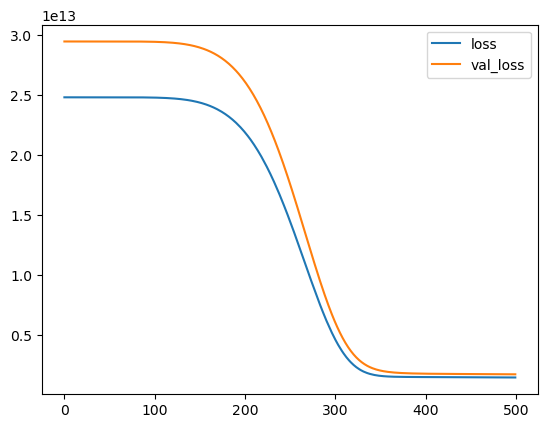

In [10]:
loss.plot()

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score

predictions = model.predict(X_test) 

mean_squared_error(y_test, predictions)
mean_absolute_error(y_test, predictions)

6/6 [==============================] - 0s 3ms/step


996535.3285060975

In [12]:
mean_absolute_error(y_test, predictions)

996535.3285060975

In [13]:
explained_variance_score(y_test,predictions)

0.5854868150073492

In [14]:
1.9847281329532507e-07

1.9847281329532507e-07

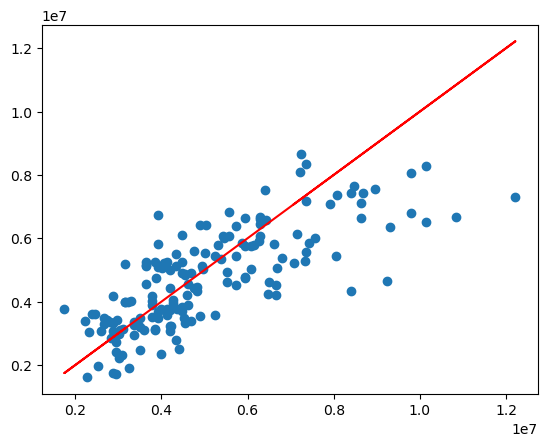

In [15]:
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')